In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

from mpmath import *
import numpy as np
import pandas as pd


In [2]:
mp.dps = 80; mp.pretty = True

In [3]:
FF_frame23L = pd.read_csv('data_frames/FF_frame_23L_Tome.txt',sep='\t',
float_precision='round_trip')
FF_frame23R = pd.read_csv('data_frames/FF_frame_23R_Tome.txt',sep='\t',
float_precision='round_trip')

FF_frame13L = pd.read_csv('data_frames/FF_frame_13L_Tome.txt',sep='\t',
float_precision='round_trip')
FF_frame13R = pd.read_csv('data_frames/FF_frame_13R_Tome.txt',sep='\t',
float_precision='round_trip')

FF_frame12L = pd.read_csv('data_frames/FF_frame_12L_Tome.txt',sep='\t',
float_precision='round_trip')
FF_frame12R = pd.read_csv('data_frames/FF_frame_12R_Tome.txt',sep='\t',
float_precision='round_trip')

In [4]:
convert_to_array = lambda df,col:np.array(list(map(mpmathify,df[col])))

def mpmathify_frame(df):
    dict = {}
    for col in df:
        #print(col)
        dict[col] = convert_to_array(df,col)
        #print(dict.keys())
    #print(dict.keys())
    return pd.DataFrame(dict)

In [5]:
FF_frame23L = mpmathify_frame(FF_frame23L)
FF_frame23R = mpmathify_frame(FF_frame23R)

FF_frame13L = mpmathify_frame(FF_frame13L)
FF_frame13R = mpmathify_frame(FF_frame13R)

FF_frame12L = mpmathify_frame(FF_frame12L)
FF_frame12R = mpmathify_frame(FF_frame12R)


In [6]:
mpf('1.0')

1.0

In [7]:
cols = ['niWW','niWG','niGW','niGG','niW','niG','Wni','Gni','Gninj','Wninj']
def total_frame(FF_df):
    FF_df['total'] = FF_df[cols].sum(axis=1)


In [8]:
total_frame(FF_frame23L)
total_frame(FF_frame23R)

total_frame(FF_frame13L)
total_frame(FF_frame13R)

total_frame(FF_frame12L)
total_frame(FF_frame12R)

In [9]:
FF_frame23L['total'][0]

(4.9926394097127970189727143830964294609780107426656819149733821752772595344925706e-31 + 0.0j)

In [10]:
#cols = cols + ['total']
m6np = FF_frame23L['m6']

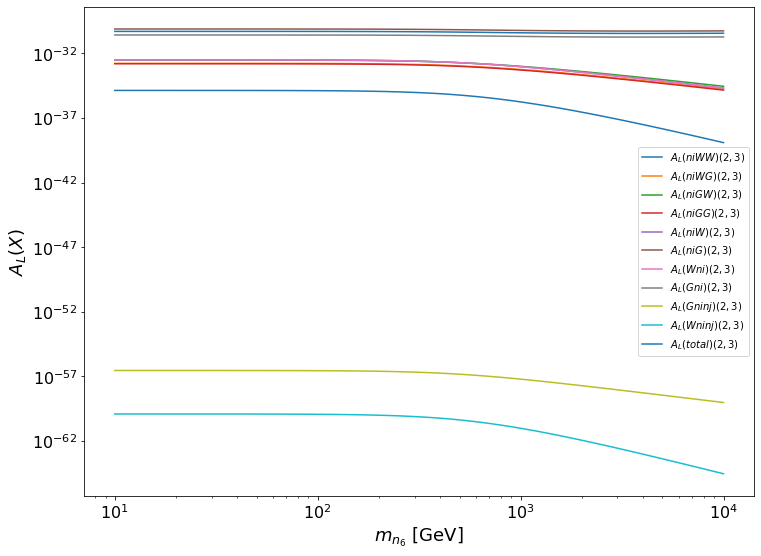

In [11]:
plt.figure(figsize=(12,9))
for dia in cols+['total']:
    plt.loglog(m6np,abs(mpmathify_frame(FF_frame23L)[dia]),label=f'$A_L({dia})(2,3)$')
plt.ylabel('$A_L(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

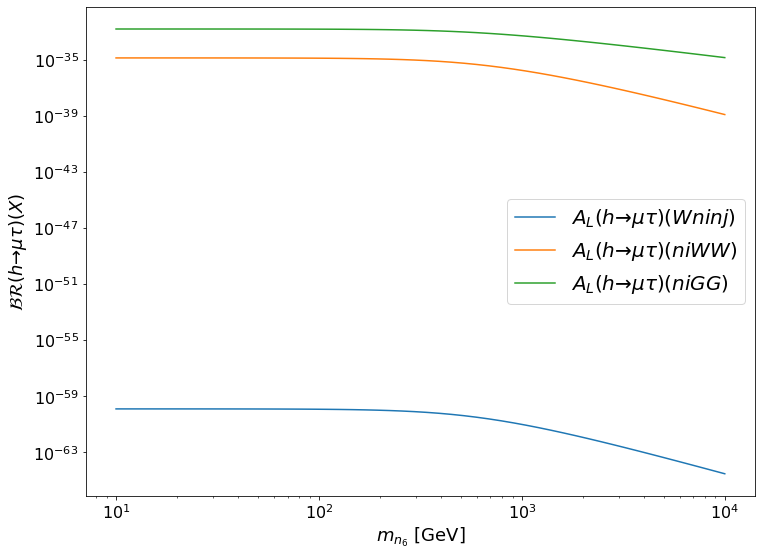

In [12]:
plt.figure(figsize=(12,9))
for dia in ['Wninj','niWW','niGG']:
    plt.loglog(m6np,abs(FF_frame23L[dia]),
    label=r'$A_L(h\to \mu \tau)$' + f'$({dia})$')
    
plt.ylabel(r'$\mathcal{BR}(h\to \mu \tau)(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
#plt.xlim(1,1e5)
#plt.ylim(1e-23,1e-12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)

In [13]:
diagG = ['Gninj','niG','Gni']# 'niGG'
diagW = ['Wninj','niWW','niW','Wni']#'niWG','niGW'
diagWG = ['niWG','niGW']
sumaGL = 0
sumaGR = 0
sumaWL = 0
sumaWR = 0
sumaWGL = 0
sumaWGR = 0
for dia in diagG:
    sumaGL += FF_frame23L[dia]
    sumaGR += FF_frame23R[dia]
for dia in diagW:
    sumaWL += FF_frame23L[dia]
    sumaWR += FF_frame23R[dia]
for dia in diagWG:
    sumaWGL += FF_frame23L[dia]
    sumaWGR += FF_frame23R[dia]


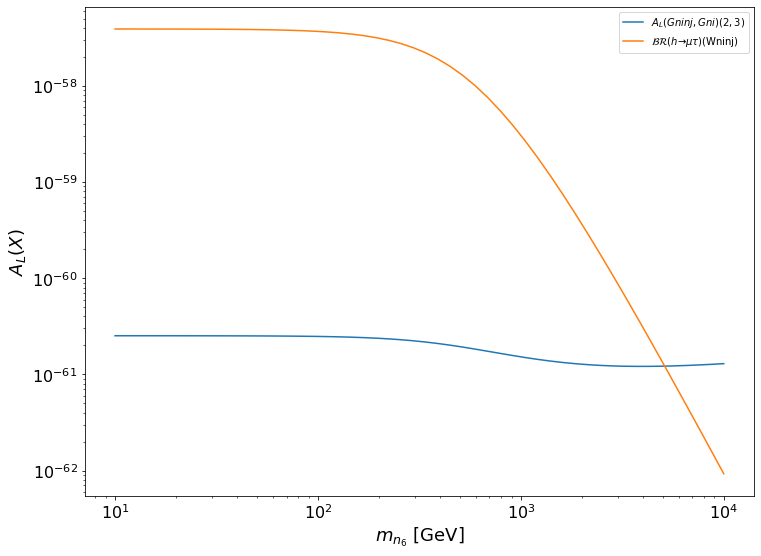

In [14]:
plt.figure(figsize=(12,9))
plt.loglog(m6np,abs(sumaGL)**2,label=f'$A_L(Gninj,Gni)(2,3)$')
plt.loglog(m6np,abs(FF_frame23L['Wninj']/(FF_frame23L['total']+0.0032)),
    label=r'$\mathcal{BR}(h\to \mu \tau)$' + '(Wninj)')
#plt.loglog(m6np,abs(sumaWL)**2,label=f'$A_L(sumaW)(2,3)$')
#plt.loglog(m6np,abs(sumaWGL)**2,label=f'$A_L(sumaWG)(2,3)$')
#plt.loglog(m6np,abs(sumaGL + sumaWL + sumaWGL)**2,'--',label=f'$A_L(total)(2,3)$',alpha=0.5)#FF_frame23L['total']
#plt.loglog(m6np,1e-34/m6np**2,label=f'$m_6^{-34}$')
plt.ylabel('$A_L(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

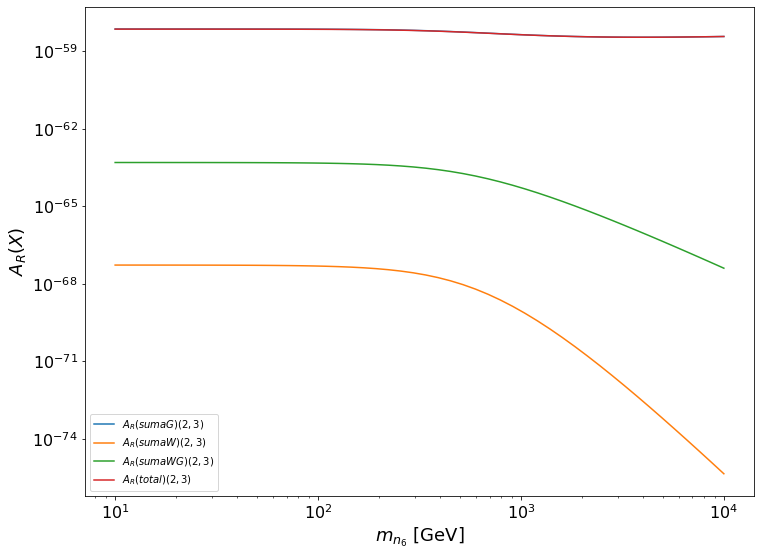

In [15]:
plt.figure(figsize=(12,9))
plt.loglog(m6np,abs(sumaGR)**2,label=f'$A_R(sumaG)(2,3)$')
plt.loglog(m6np,abs(sumaWR)**2,label=f'$A_R(sumaW)(2,3)$')
plt.loglog(m6np,abs(sumaWGR)**2,label=f'$A_R(sumaWG)(2,3)$')
plt.loglog(m6np,abs(FF_frame23R['total'])**2,label=f'$A_R(total)(2,3)$')
# plt.loglog(m6np,1e-34/m6np**2,label=f'$m_6^{{(-34)}}$')
plt.ylabel('$A_R(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

In [16]:
import OneLoopLFVHD as lfvhd

In [17]:
Γhlilj = lfvhd.Γhlilj
from OneLoopLFVHD.data import ml


In [18]:
Γhl2l3 =  Γhlilj(FF_frame23L['total'],FF_frame23R['total'],mpf('125.1'),ml[2],ml[3])

Γhl1l3 =  Γhlilj(FF_frame13L['total'],FF_frame13R['total'],mpf('125.1'),ml[1],ml[3])

Γhl1l2 =  Γhlilj(FF_frame12L['total'],FF_frame12R['total'],mpf('125.1'),ml[1],ml[2])

Wtot = Γhl2l3 + Γhl1l3 + Γhl1l2 + 0.0032

In [19]:
Γhl2l3_Gninj_Gni =  Γhlilj(
    FF_frame23L['Gninj'] + FF_frame23L['Gni'] + FF_frame23L['niG'],
    FF_frame23R['Gninj'] + FF_frame23R['Gni'] + FF_frame23R['niG'],
    mpf('125.1'),ml[2],ml[3])

Γhl2l3_Wninj =  Γhlilj(FF_frame23L['Wninj'],FF_frame23R['Wninj'],mpf('125.1'),ml[2],ml[3])

Γhl2l3_niGG =  Γhlilj(FF_frame23L['niGG'],FF_frame23R['niGG'],mpf('125.1'),ml[2],ml[3])
Γhl2l3_niWW =  Γhlilj(FF_frame23L['niWW'],FF_frame23R['niWW'],mpf('125.1'),ml[2],ml[3])

Γhl2l3_niWG =  (
    Γhlilj(FF_frame23L['niWG'],FF_frame23R['niWG'],mpf('125.1'),ml[2],ml[3]) + 
    Γhlilj(FF_frame23L['niGW'],FF_frame23R['niGW'],mpf('125.1'),ml[2],ml[3])
    )


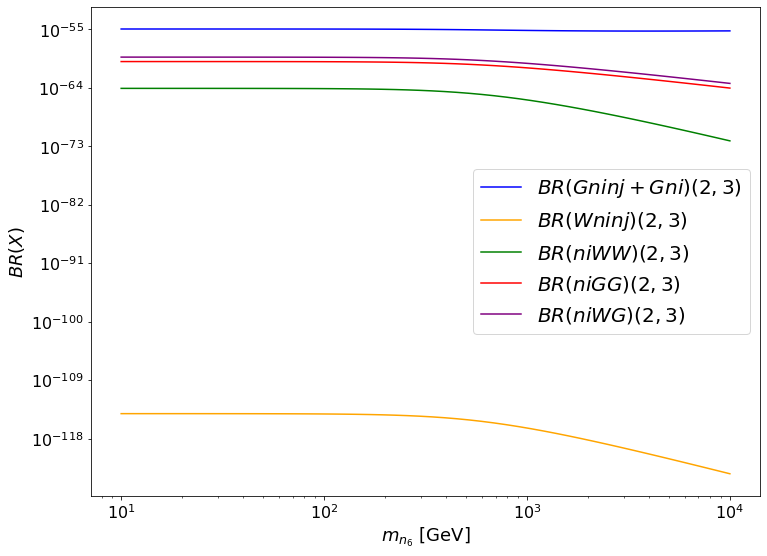

In [20]:
plt.figure(figsize=(12,9))
plt.loglog(m6np,abs(Γhl2l3_Gninj_Gni/Wtot),'b',label=f'$BR(Gninj + Gni)(2,3)$')
plt.loglog(m6np,abs(Γhl2l3_Wninj/Wtot),'orange',label=f'$BR(Wninj)(2,3)$')
plt.loglog(m6np,abs(Γhl2l3_niWW/Wtot),'g',label=f'$BR(niWW)(2,3)$')
plt.loglog(m6np,abs(Γhl2l3_niGG/Wtot),'red',label=f'$BR(niGG)(2,3)$')
plt.loglog(m6np,abs(Γhl2l3_niWG/Wtot),'purple',label=f'$BR(niWG)(2,3)$')

#plt.xlim(10,1e4)
#plt.ylim(1e-40,1e-28)
plt.ylabel('$BR(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)

In [21]:
Γhliji_frame = pd.DataFrame({'Whl2l3':Γhl2l3,'Whl1l3':Γhl1l3,'Whl1l2':Γhl1l2})

In [22]:
Γhliji_frame = mpmathify_frame(Γhliji_frame)

In [23]:
def total_width_frame(FF_df):
    FF_df['total'] = FF_df.sum(axis=1) 
    FF_df['total'] = FF_df['total'] + mpf('0.0032')
total_width_frame(Γhliji_frame) 

In [24]:
ALG = 0
ARG = 0
for width in diagG:
    ALG += FF_frame23L[width]
    ARG += FF_frame23R[width]

ALW = 0
ARW = 0
for width in diagW:
    ALW += FF_frame23L[width]
    ARW += FF_frame23R[width]

ALWG = 0
ARWG = 0
for width in diagWG:
    ALWG += FF_frame23L[width]
    ARWG += FF_frame23R[width]



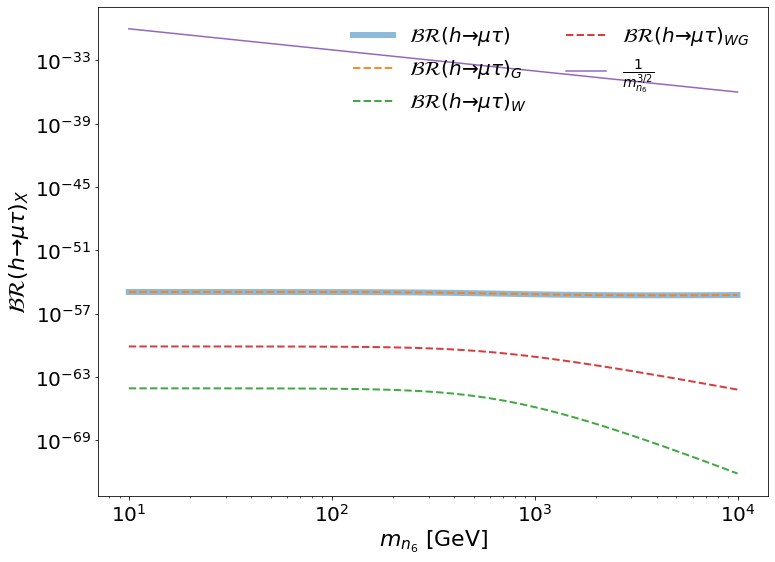

In [25]:
plt.figure(figsize=(12,9))

plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'-',
label=r'$\mathcal{BR}(h \to \mu \tau)$',alpha=0.5,linewidth=6)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALG,MR=ARG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{G}$',linewidth=2,alpha=0.9)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALW,MR=ARW,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{W}$',linewidth=2,alpha=0.9)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALWG,MR=ARWG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{WG}$',linewidth=2,alpha=0.9)

plt.loglog(m6np,1e-28/m6np**(2),label=r'$\frac{1}{m_{n_6}^{3/2}}$')

plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)_{X}$',fontsize=22)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=22)
#plt.ylim(1e-55,1e-12)
#plt.xlim(1e-1,1e15)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=2,fontsize=20,frameon=False)
plt.savefig('data_frames\BRhl2l3_contributions.png',dpi=200)

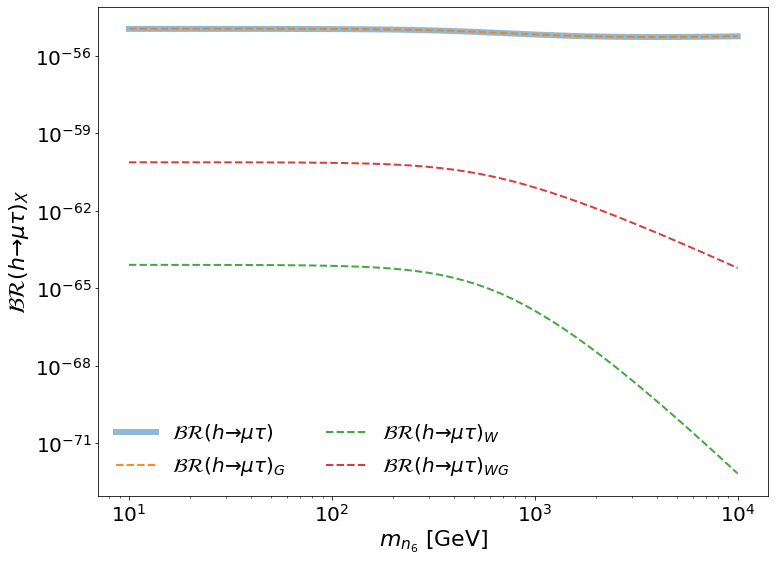

In [26]:
plt.figure(figsize=(12,9))

plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'-',
label=r'$\mathcal{BR}(h \to \mu \tau)$',alpha=0.5,linewidth=6)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALG,MR=ARG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{G}$',linewidth=2,alpha=0.9)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALW,MR=ARW,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{W}$',linewidth=2,alpha=0.9)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALWG,MR=ARWG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{WG}$',linewidth=2,alpha=0.9)

plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)_{X}$',fontsize=22)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=2,fontsize=20,frameon=False)

In [27]:
from Unu_seesaw import Ynu
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

m1 = mpf('1e-10')  #GeV 

#current values to Square mass differences
d21 = Nudata.squareDm21.central*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = Nudata.squareDm31.central*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

def Acoy(a,b,m6):
    Y =  Ynu(m1,m2,m3,m6,m6,m6)
    M = [m1,m2,m3,m6,m6,m6]
    F = mp.fsum(
        [
            mp.conj(Y[i,a-1])*Y[i,b-1]/M[i]**2*mp.log(M[i]/mpf('80.379')) for i in range(3)
        ]
        )
    return F

Acoy = np.array([abs(Acoy(2,3,m))**2 for m in m6np])


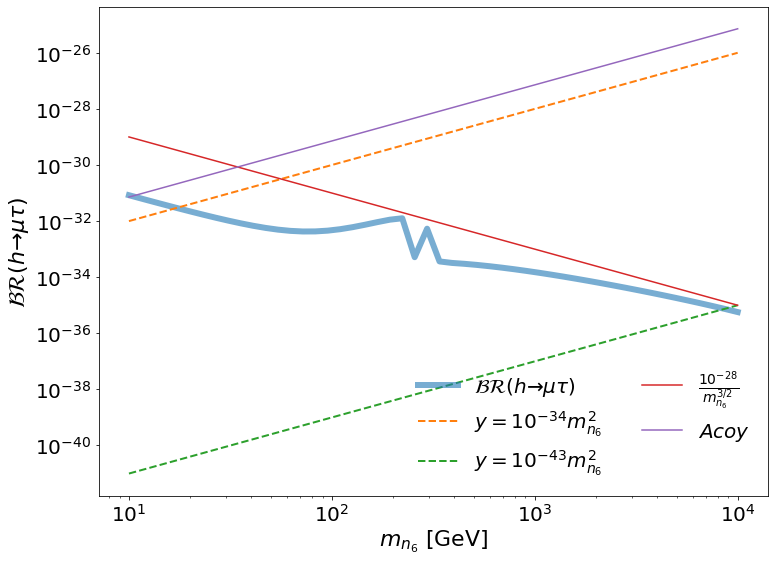

In [28]:
plt.figure(figsize=(12,9))

plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'-',
label=r'$\mathcal{{BR}}(h \to \mu \tau)$',alpha=0.6,linewidth=6)

# plt.loglog(m6np,abs(
#     Γhlilj(ML=ALG,MR=ARG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
#         ),'-',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{G}$',linewidth=3,alpha=0.7)

# plt.loglog(m6np,abs(
#     Γhlilj(ML=ALW,MR=ARW,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
#         ),'-',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{W}$',linewidth=3,alpha=0.7)

# plt.loglog(m6np,abs(
#     Γhlilj(ML=ALWG,MR=ARWG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
#         ),'-',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{WG}$',linewidth=3,alpha=0.7)



plt.loglog(m6np,1e-34*m6np**2,'--',label='$y = 10^{-34}m_{n_6}^2$',linewidth=2,
alpha=1)
plt.loglog(m6np,1e-43*m6np**2,'--',label='$y = 10^{-43}m_{n_6}^2$',linewidth=2,
alpha=1)
#plt.loglog(m6np,1e-72*m6np**4,'--',label='$10^{-72}m_{n_6}^4$',linewidth=2,alpha=0.6)

plt.loglog(m6np,1e-27/m6np**(2),label=r'$\frac{10^{-28}}{m_{n_6}^{3/2}}$')

plt.loglog(m6np,1e-45*Acoy,label=r'$Acoy$')

###################################################
# plt.xticks([1,125.1,1e4,1e8,1e12,1e15],
#             ['1','$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=20)
# plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=20)

#plt.ylim(1e-46,1e-6)
#plt.xlim(1e-1,1e15)
#####################################################
plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)$',fontsize=22)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=2,fontsize=20,frameon=False)
plt.savefig('data_frames\BRhl2l3_pendientes.png',dpi=200)

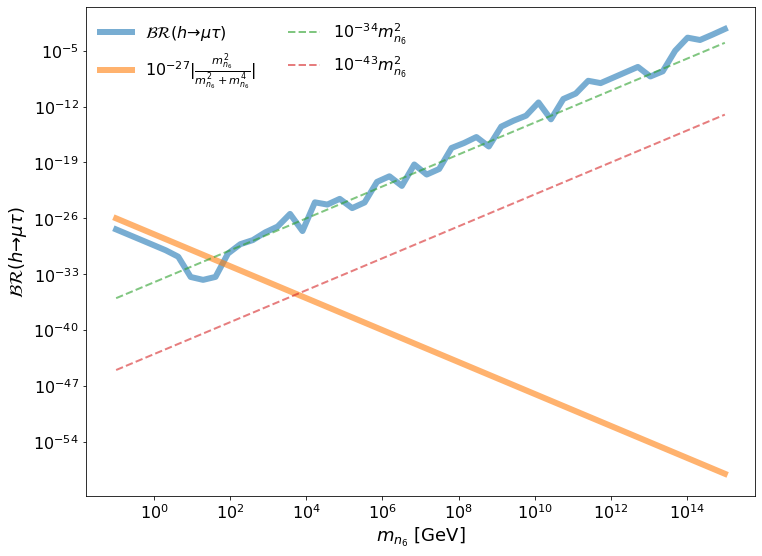

In [60]:
plt.figure(figsize=(12,9))

plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'-',
label=r'$\mathcal{{BR}}(h \to \mu \tau)$',alpha=0.6,linewidth=6)

plt.loglog(m6np,10**(-28)*abs(1/(m6np**2)),'-',
label=r'$10^{-27}|\frac{m_{n_6}^2}{m_{n_6}^2+ m_{n_6}^4}|$',alpha=0.6,linewidth=6)

plt.loglog(m6np,1e-34*m6np**2,'--',label='$10^{-34}m_{n_6}^2$',linewidth=2,
alpha=0.6)
plt.loglog(m6np,1e-43*m6np**2,'--',label='$10^{-43}m_{n_6}^2$',linewidth=2,
alpha=0.6)
#plt.loglog(m6np,1e-72*m6np**4,'--',label='$10^{-72}m_{n_6}^4$',linewidth=2,alpha=0.6)


###################################################
# plt.xticks([1,125.1,1e4,1e8,1e12,1e15],
#             ['1','$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=20)
# plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=20)

# plt.ylim(1e-49,1e-9)
# plt.xlim(1e-1,1e15)
#####################################################
plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=2,fontsize=16,frameon=False)
#plt.savefig('data_frames\BRhl2l3_pendientes.png',dpi=200)

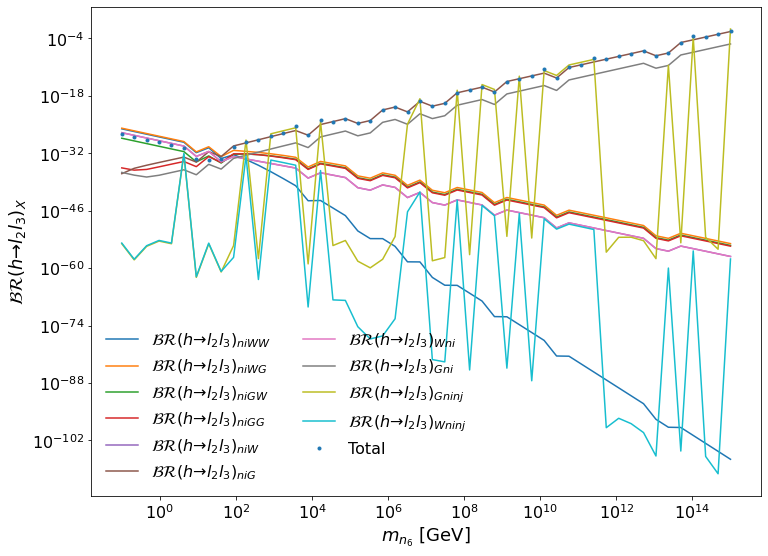

In [61]:
plt.figure(figsize=(12,9))
for width in cols:
    plt.loglog(m6np,abs(
        Γhlilj(
            FF_frame23L[width],FF_frame23R[width],mpf('125.1'),ml[2],ml[3]
            )/Γhliji_frame['total']
        ),label=fr'$\mathcal{{BR}}(h \to l_2 l_3)_{{{width}}}$')
plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'.',label='Total')

plt.ylabel(r'$\mathcal{BR}(h \to l_2 l_3)_{X}$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=2,fontsize=16,frameon=False)

In [37]:
def Whlilj(AL,AR):
    mh = mpf('125.1')
    return (mh/8*mp.pi)*(abs(AL)**2 + abs(AR)**2)

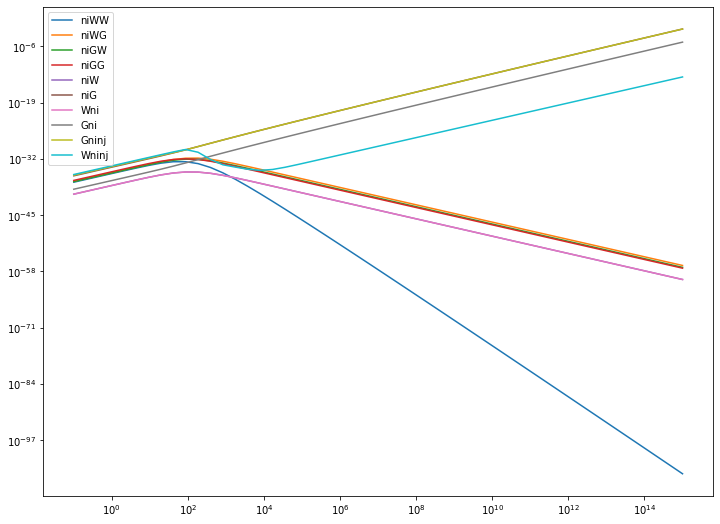

In [38]:
plt.figure(figsize=(12,9))
for width in cols:
    plt.loglog(m6np,abs(
        Whlilj(
            FF_frame23L[width],FF_frame23R[width]
            )/Γhliji_frame['total']
        ),label=width)
plt.legend()